# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/all.csv
- https://github.com/cs109/2015lab1/blob/master/hamlet.txt

We are going to go through the *Lab1-babypython.ipynb* and *Lab1-pythonpandas.ipynb*. The orginal Python notebooks were written in Python 2. We converted the notebooks into Python 3, which can be downloaded from here"

- https://github.com/CIS3715-temple-2019/CIS3715-temple-2019.github.io/blob/master/CIS3715-Lab3.A-babypython_py3.ipynb
- https://github.com/CIS3715-temple-2019/CIS3715-temple-2019.github.io/blob/master/CIS3715-Lab3.A-pythonpandas_py3.ipynb

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*.



**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [3]:
## all imports
from IPython.display import HTML
import numpy as np
import requests
import bs4 # beautiful soup
import time
import operator
import socket
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the user data:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']    # pass in column names for each CSV

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols, engine='python')

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols, engine='python')

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
# Read the movies data
# The movies file contains columns indicating the movie's genres
# Let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), engine='python', encoding = "ISO-8859-1")

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [9]:
print(movies.dtypes)
print()
print(movies.describe())
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [15]:
print(users.head())
print('\n')
print(users['occupation'].head())
print('\n')
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())
print('\n')
print(users.iloc[3])

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object


   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [17]:
# Extract data within a range
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [26]:
# users aged 40 AND male
# your code here
fourtyUsers = users[users.age == 40]
maleUsers = fourtyUsers[fourtyUsers.sex == 'M']
print(maleUsers.head())
## users who are female and programmers
# your code here
femaleUsers = users[users.sex == 'F']
programmers = femaleUsers[femaleUsers.occupation == 'programmer']
print(programmers.head())

## show statistic summary or compute mean
# your code here
print(users.describe())

     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232
199      200   40   M  programmer    93402
283      284   40   M   executive    92629
     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105
          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [21]:
print(ratings.head())
## split data per user ID
grouped_data = ratings.groupby('user_id')

## count and combine
ratings_per_user = grouped_data.count()

print(ratings_per_user.head(5))

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
         movie_id  rating  unix_timestamp
user_id                                  
1             272     272             272
2              62      62              62
3              54      54              54
4              24      24              24
5             175     175             175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [34]:
## split data per movie
# your code here
grouped_data = ratings.groupby('movie_id')
## average and combine
# your code here
avg_per_movie = grouped_data.mean()
# get the maximum rating
# your code here
print(avg_per_movie)
print(avg_per_movie['rating'].max())
# get movie ids with that rating
# your code here
max_id = avg_per_movie['rating'].idxmax()
print("Good movie ids:", max_id)
# get the movie title
# your code here
print("Best movie titles: ", movies[movies['movie_id'] == max_id]['title'])

# get number of ratings per movie
# your code here
avg_num_ratings = ratings.groupby('movie_id').count().mean()['rating']
print("Number of ratings per movie: ", avg_num_ratings)

             user_id    rating  unix_timestamp
movie_id                                      
1         477.011062  3.878319    8.828054e+08
2         492.007634  3.206107    8.834174e+08
3         459.133333  3.033333    8.822269e+08
4         469.497608  3.550239    8.827175e+08
5         439.372093  3.302326    8.825882e+08
...              ...       ...             ...
1678      863.000000  1.000000    8.892896e+08
1679      863.000000  3.000000    8.892895e+08
1680      863.000000  2.000000    8.892896e+08
1681      896.000000  3.000000    8.871607e+08
1682      916.000000  3.000000    8.808458e+08

[1682 rows x 3 columns]
5.0
Good movie ids: 814
Best movie titles:  813    Great Day in Harlem, A (1994)
Name: title, dtype: object
Number of ratings per movie:  59.45303210463734


**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [52]:
# get the average rating per user
# your code here
grouped_data = ratings.groupby('user_id')
avg_per_user = grouped_data.mean().mean()['rating']
print(avg_per_user)

# list all occupations and if they are male or female dominant
# your code here

print('number of male users: ')
print(sum(users['sex'] == 'M'))

print('number of female users: ')
print(sum(users['sex'] == 'F'))

for k, group in users.groupby('occupation'):
    print(group['occupation'].iloc[0])
    print(group['sex'].value_counts())
    if male > female:
        print('Male dominant.')
    else:
        print('Female dominant.')
# grouped_data = users.groupby('occupation')
# print(grouped_data.count())

3.588191107184803
number of male users: 
670
number of female users: 
273
administrator
M    43
F    36
Name: sex, dtype: int64
Female dominant.
artist
M    15
F    13
Name: sex, dtype: int64
Female dominant.
doctor
M    7
Name: sex, dtype: int64
Female dominant.
educator
M    69
F    26
Name: sex, dtype: int64
Female dominant.
engineer
M    65
F     2
Name: sex, dtype: int64
Female dominant.
entertainment
M    16
F     2
Name: sex, dtype: int64
Female dominant.
executive
M    29
F     3
Name: sex, dtype: int64
Female dominant.
healthcare
F    11
M     5
Name: sex, dtype: int64
Female dominant.
homemaker
F    6
M    1
Name: sex, dtype: int64
Female dominant.
lawyer
M    10
F     2
Name: sex, dtype: int64
Female dominant.
librarian
F    29
M    22
Name: sex, dtype: int64
Female dominant.
marketing
M    16
F    10
Name: sex, dtype: int64
Female dominant.
none
M    5
F    4
Name: sex, dtype: int64
Female dominant.
other
M    69
F    36
Name: sex, dtype: int64
Female dominant.
programmer
M

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


Below is an example for a minimal webpage defined in HTML tags. The root tag is 'html' and then you have the 'head' tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The 'body' tag marks the actual content of the page. You can play around with the 'h2' tag trying different header levels. They range from 1 to 6. 

In [4]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [99]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = requests.get(url).text
# print(source)
# print(type(source))

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [6]:
## your code here
## is 'Alice' in source?
if 'Alice' in source:
    print(True)
else:
    print(False)

## count occurences of 'Soup'
print(source.count('Soup'))

## find index of 'alien video games'
print(source.find('alien video games'))

False
49
-1


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [7]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
# print(soup)
# print(soup.prettify())

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
# soup.findAll('Soup')

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 gr

More examples:

In [10]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')
print(first_tag)

## get attribute `href`
print(first_tag.get('href'))

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
print(link_list)

<a href="#Download">Download</a>
#Download
['#Download', 'bs4/doc/', '#HallOfFame', 'enterprise.html', 'https://code.launchpad.net/beautifulsoup', 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'zine/', 'bs4/download/', 'http://lxml.de/', 'http://code.google.com/p/html5lib/', 'bs4/doc/', 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'https://bugs.launchpad.net/beautifulsoup/', 'https://tidelift.com/security', 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website', 'zine/', None, 'bs4/download/', 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html', 'download/3.x/BeautifulSoup-3.2.2.tar.gz', 'https://tidelift.com/subscription/pkg/pypi-be

In [11]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object is not subscriptable

In [12]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements! Let's verify:
# print(sum([l is None for l in link_list]))

# So there are two elements in the list that are None!

['#Download',
 'bs4/doc/',
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.2.tar.gz',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_sourc

In [70]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [13]:
# we can put this in a list comprehension as well, it almost reads like a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

Parsing the Tree:

In [16]:
# redefining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [49]:
## get h3 tag from body

root_node = soup.html
head = root_node.contents[0]
body = root_node.contents[1]

## use ul as entry point

tmp = [l for l in soup.body.findAll('ul')[0].findAll('li')]
print(tmp)

## get hall of fame list from entry point
## skip the first entry 

## reformat into a list containing strings
## it is ok to have a list of lists

[<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.

</li>, <li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li>, <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li>, <li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li>, <li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

</li

`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [50]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print('\n'.join(test))

<a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.


Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.


Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.


The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.


The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.


The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA

**Question 7**:
- Explain in detail what is Python doing in the previous line

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

In [93]:
s = soup.get_text()
contents = []
symbol = ['\n', ' ', ',', '?', '!', '.']
for w in s.split(' '):
    if w not in symbol and w.isalpha():
        w = re.findall(r'\w+', w)
        for c in w:
            if c != '':
                contents.append(c)

In [94]:
d = {}
for w in contents:
    if w not in d:
        d[w] = 1
    else:
        d[w] += 1

In [95]:
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)[:20]}

In [96]:
d_sorted

{'Soup': 32,
 'Beautiful': 27,
 'the': 23,
 'to': 21,
 'a': 18,
 'of': 17,
 'and': 15,
 'you': 13,
 'on': 12,
 'Python': 12,
 'is': 11,
 'or': 9,
 'in': 7,
 'it': 6,
 'as': 6,
 'for': 5,
 'like': 5,
 'have': 5,
 'can': 5,
 'that': 4}

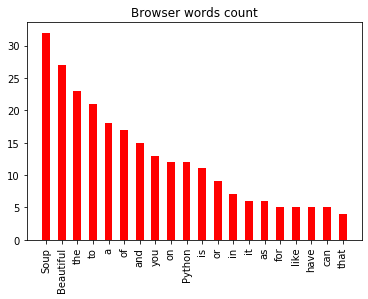

In [97]:
plt.bar(d_sorted.keys(), d_sorted.values(), width=0.5, color='r')
plt.xticks(rotation='vertical')
plt.title('Browser words count')
plt.show()

In [100]:
contents = []
symbol = ['\n', ' ', ',', '?', '!', '.']
for w in source.split(' '):
    if w not in symbol and w.isalpha():
        w = re.findall(r'\w+', w)
        for c in w:
            if c != '':
                contents.append(c)

In [101]:
d = {}
for w in contents:
    if w not in d:
        d[w] = 1
    else:
        d[w] += 1

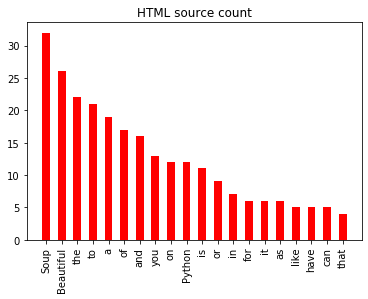

In [102]:
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)[:20]}
plt.bar(d_sorted.keys(), d_sorted.values(), width=0.5, color='r')
plt.xticks(rotation='vertical')
plt.title('HTML source count')
plt.show()